# Predicción
**Autores:** José A. Troyano, Beatriz Pontes &nbsp;&nbsp;&nbsp; **Última modificación:** 10/03/2022

---------------------------------------------------------------------
## Contenido

1. <a href="#entrenamiento_clf"> Entrenamiento de un clasificador </a> <br>
    1.1. <a href="#reg_log"> ¿Qué es la regresión logística? ¿Es regresión o clasificación? </a> <br>
    1.2. <a href="#estimador_reg_log"> El estimador _LogisticRegression_ </a>  <br>
2. <a href="#metricas_clf"> Métricas de evaluación de clasificadores </a> <br>
    2.1. <a href="#confusion"> Matriz de confusión: TP, FP, TN, FN </a> <br>
    2.2. <a href="#pcf1"> Precisión, cobertura y f1 </a> <br>
    2.3.  <a href="#clasificadores"> Experimentos de clasificación </a> <br>
    
3. <a href="#entrenamiento_reg"> Entrenamiento de un regresor  </a> <br>
    3.1. <a href="#regresion_lineal"> Regresión lineal </a><br>
    3.2. <a href="#estimador_reg_lin"> El estimador _LinearRegression_ </a> <br>
4. <a href="#metricas_reg"> Métricas de evaluación de regresores </a> <br>
    4.1. <a href="#r2"> Coeficiente r2 </a> <br>
    4.2. <a href="#mae"> MAE </a> <br>
    4.3. <a href="#regresores"> Experimentos de regresión  </a> <br>
------------------------------------------------------

En este notebook veremos cómo entrenar un estimador de sklearn y distintas formas de evaluar la calidad del modelo obtenido. Trabajaremos con clasificadores (predicción de un atributo discreto) y regresores (predicción de un atributo numérico). 

Empezaremos por importar todos los elementos que usaremos a lo largo del notebook:

In [3]:
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Numpy, scipy y pandas
import numpy as np
import scipy.stats
import pandas as pd

# Datasets
from sklearn.datasets import load_breast_cancer

# Evaluación
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, learning_curve

# Visualización
import seaborn as sns
from pySankey import sankey     # pip install pySankey
import matplotlib.pyplot as plt

print("All done!")

%matplotlib inline

All done!


## 1. Entrenamiento de un clasificador <a name="entrenamiento_clf"> </a>

Usaremos el dataset _breast cancer_, disponible en el repositorio UCI y también incluido en el conjunto de datasets de prueba de Sklearn. 

El dataset contiene 569 registros correspondientes a pacientes de cáncer de mama. Los atributos se corresponden con métricas calculadas sobre las células identificadas en imágenes de biopsias. Para cada paciente se realizan 10 métricas sobre varias células, y para cada métrica se registran la media, desviación estándar y peor resultado de todos valores. La clase a predecir es $0$ ó $1$ en función de que el tumor sea maligo o no.

In [5]:
# EJERCICIO: acceder al dataset disponible en sklearn y crear el dataframe 'X' para los atributos, y la serie 'y' para la clase
#    - Mostrar información sobre las columnas
#    - Mostrar con una gráfica la distribución de los valores de la clase
X, y = load_breast_cancer(return_X_y = True, as_frame = True)

In [6]:
X.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
y.value_counts()

1    357
0    212
Name: target, dtype: int64

<AxesSubplot:>

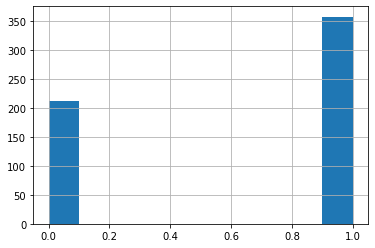

In [10]:
y.hist()

Entrenar un clasificador es muy simple en Sklearn. Basta con crear un objeto del estimador que queramos entrenar y ejecutar el método <code>fit</code>. En este notebook usaremos uno de los clasificadores que mejor resultado suele dar de los disponibles en Sklearn: <code>LogisticRegression</code>. 

### 1.1. ¿Qué es la regresión logística? ¿Es regresión o clasificación? <a name="reg_log"> </a>

Es una técnica que se usa para predecir el resultado de una variable discreta, es por tanto una _técnica de clasificación_. En su formulación más simple (la binaria) se aprende a estimar la probabilidad de que una instancia pertenezca a la clase positiva de la siguiente forma:
- Probabilidades cercanas a $1$ darán lugar a clasificar la instancia como de la clase positiva
- Probabilidades cercanas a $0$ darán lugar a clasificar la instancia como de la clase negativa



El modelo logístico establece la siguiente relación entre la probabilidad de pertenecer a la clase positiva y los valores de los atributos de la instancia $X$:

$$
P(X) = P(y=1\;| \;x_1, x_2, ..., x_n)  = \frac{1}{1+exp(-\alpha-\beta_1x_1-\beta_2x_2...-\beta_nx_n)}
$$

A este tipo de funciones se les denomina _logísticas_ (de ahí el nombre _regresión logística_).

Se puede generalizar a una clasificación no binaria (con $k$ categorías) mediante la construcción de $k-1$ clasificadores binarios.

La función _logit_ nos permite convertir el problema de estimar la probablilidad en un problema de regresión lineal. Esta es la función _logit_:
$$
logit(p) = ln(\frac{p}{1-p})
$$

Y mediante una serie de transformaciones se demuestra que:

$$
logit(P(y=1\;| \;x_1, x_2, ..., x_n)) = \alpha+\beta_1x_1+\beta_2x_2...+\beta_nx_n
$$

Gracias a usar la función _logit_ como función de enlace se consigue una formulación lineal del problema, lo que permite la aplicación de técnicas de regresión lineal (de ahí el nombre _regresión_ logística)  para el aprendizaje de los coeficientes $\alpha$ y $\beta_i$.



### 1.2. El estimador <code>LogisticRegression</code> <a name="estimador_reg_log"> </a>

#### 1.2.1 Entrenamiento con el conjunto de datos completo 

In [ ]:
'''
1. Entrenar el clasificador con X,y.
2. Separar X_80, y_80 (para entrenar) y X_20, y_20 (para validar).
3. Validación cruzada (porque es un conjunto demasiado pequeño); separando por distintos conjuntos (apartado 2 repetido varias veces).
'''

In [13]:
# EJERCICIO: crear un estimador de la clase LogisticRegression y entrenarlo con el dataset <X,y>
from sklearn.linear_model import LogisticRegression

# Sin el parámetro liblinear necesita más iteraciones, provocaría un fallo.
clasificador = LogisticRegression(solver = 'liblinear')
clasificador.fit(X,y)

LogisticRegression(solver='liblinear')

Una vez entrenado un clasificador, podemos usarlo para predecir la clase de un conjunto de instancias con el método <code>predict</code>.

In [18]:
# EJERCICIO: predecir la salida de los primeros 10 valores de X con el clasificador entrenado anteriormente
y_pred = clasificador.predict(X)

# Comparar las etiquetas predichas con las reales:
print(y_pred[:10])
print(y[:10])

# Vemos que en el 4º, falla.

# Precisión de la predicción:
metrics.accuracy_score(y, y_pred)

[0 0 0 1 0 0 0 0 0 0]
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: target, dtype: int32


0.9595782073813708

#### 1.2.2 Separación en conjuntos de entrenamiento y validación 

In [22]:
# EJERCICIO: dividir el dataset <X, y> en dos datasets <X_train, y_train> y <X_test, y_test> con una distribución 80%-20%,
#            entrenar el clasificador con <X_train, y_train> y calcular la métrica accuracy con <X_test, y_test>
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Entrenar 
clasificador.fit(X_train,y_train)

# Validar 
y_pred_2 = clasificador.predict(X_test)
print(y_pred_2[:10])
print(y_test[:10])

# Precisión:
metrics.accuracy_score(y_test, y_pred_2)

# Si se ejecuta más veces, se ve que la precisión es poco estable (cambia mucho).

[1 1 1 1 0 0 1 0 1 1]
305    1
511    1
386    1
527    1
11     0
265    0
536    0
512    0
428    1
375    1
Name: target, dtype: int32


0.9473684210526315

Una vez entrenado un clasificador, podemos usarlo para predecir la clase de un conjunto de instancias con el método <code>predict</code>. Muchos estimadores nos proporcionan también las probabilidades de cada una de las clases gracias al método <code>predict_proba</code>.

In [23]:
# EJERCICIO: calcular las probabilidades de cada clase para las instancias de X_test y guardarlas en y_test_proba
y_test_prob = clasificador.predict_proba(X_test)
print(y_test_prob[:10])

[[6.33236441e-03 9.93667636e-01]
 [1.74774001e-03 9.98252260e-01]
 [2.59774683e-03 9.97402253e-01]
 [1.25594803e-03 9.98744052e-01]
 [9.99989911e-01 1.00893485e-05]
 [1.00000000e+00 2.50545567e-32]
 [1.63366543e-01 8.36633457e-01]
 [9.86610315e-01 1.33896855e-02]
 [1.67824468e-04 9.99832176e-01]
 [4.06299492e-03 9.95937005e-01]]


Como podemos observar aparecen dos probabilidades para cada fila: la probabilidad de elegir la clase $0$ y la probabilidad de elegir la clase $1$. Un análisis de la distribución de estas probabilidades, nos dará pistas sobre si el conjunto de datos a clasificar está _bien separado_. Si es así, habrá pocos casos dudosos al clasificador le costará menos trabajo decidir.

<AxesSubplot:>

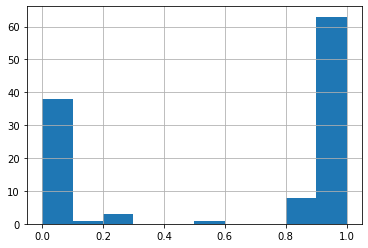

In [24]:
# EJERCICIO: mostrar con un histograma la distribución de la probabilidad de pertenecer a la clase 1
y_test_proba_1 = pd.Series(y_test_prob[:, 1])
y_test_proba_1.hist()

#### 1.2.3 Entrenamiento y evaluación mediante validación cruzada

Podemos aplicar validación cruzada para evaluar. Por defecto la métrica de evaluación es <code>accuracy_score</code> aunque, como veremos en la siguiente sección, hay más métricas implementadas en Sklearn.

In [35]:
# EJERCICIO: predecir la salida de todas las instancias mediante validación cruzada y guardar las prediccciones en y_pred
y_pred_cross = cross_val_predict(clasificador, X, y, cv = 10)  # cv es el nº de particiones
print(y_pred_cross[:10])
print("")

# Precisión
print(metrics.accuracy_score(y, y_pred_cross))
print("")

# Si se ejecuta más veces, se ve que la precisión es más estable.

# Otra forma: devuelve un array de precisiones de cada conjunto:
scores = cross_val_score(clasificador, X, y, cv = 10)
print(scores)
print("")

# Si hacemos la media:
print(scores.mean())

[0 0 0 1 0 0 0 0 0 0]

0.9490333919156415

[0.94736842 0.9122807  0.92982456 0.94736842 0.96491228 0.96491228
 0.94736842 0.94736842 0.96491228 0.96428571]

0.9490601503759398


In [28]:
# Para usar accuracy_score sin llamar a la librería:
from sklearn.metrics import accuracy_score

In [39]:
# EJERCICIO: calcular las probabilidades de cada clase para todas las instancias y guardarlas en y_pred_prob
y_pred_prob = cross_val_predict(clasificador, X, y, cv=10, method = "predict_proba")
y_pred_prob[:10]

array([[1.00000000e+00, 4.99487439e-16],
       [9.99999991e-01, 8.53704616e-09],
       [9.99999973e-01, 2.68005572e-08],
       [3.01677356e-01, 6.98322644e-01],
       [9.99991759e-01, 8.24114569e-06],
       [8.05671368e-01, 1.94328632e-01],
       [9.99999480e-01, 5.19771382e-07],
       [9.85025693e-01, 1.49743070e-02],
       [8.94823562e-01, 1.05176438e-01],
       [9.96454734e-01, 3.54526577e-03]])

<AxesSubplot:>

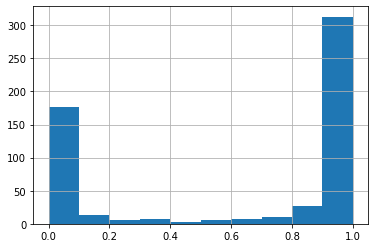

In [40]:
# EJERCICIO: mostrar con un histograma la distribución de la probabilidad de pertenecer a la clase 1 
y_pred_proba_1 = pd.Series(y_pred_prob[:,1]) # Predicción del ejercicio anterior
y_pred_proba_1.hist()

## 2. Métricas de evaluación <a name="metricas_clf"> </a>

A partir de esta sección trabajaremos sobre los resultados de la validación cruzada (mediante las series <code>y</code> e <code>y_pred</code>) aunque el análisis podía haberse hecho perfectamente con una evaluación _train/test_.

En el siguiente enlace se puede consultar la evaluación de modelos en sklearn:
https://scikit-learn.org/stable/modules/model_evaluation.html

### 2.1. Matriz de confusión: TP, FP, TN, FN <a name="confusion"> </a>

La matriz de confusión muestra el número de veces que se han producido los distintos tipos de aciertos y fallos. En una clasificación binaria tiene cuatro celdas que suelen denominarse con los siguientes nombres:
- TP: _true positives_
- TN: _true negatives_
- FP: _false positives_
- FN: _false negatives_

In [ ]:
'''
Accuracy = (TP + TN) / N
'''

In [44]:
# EJERCICIO: crear la matriz de confusión a partir de 'y' e 'y_pred' en un DataFrame con esta estructura:
#   - Columnas: [Predicted 0, Predicted 1]
#   - Índice: [True 0,True 1]
# Usamos y_pred_cross, que es la ultima evaluación cruzada hecha.

cm = pd.DataFrame(metrics.confusion_matrix(y, y_pred_cross), columns = ["Pred0", "Pred1"], index = ["True0", "True1"])
cm

Pred0  Pred1
True0    194     18
True1     11    346

<AxesSubplot:>

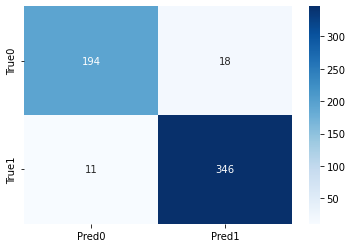

In [47]:
# EJERCICIO: mostrar la matriz de confusión mediante un mapa de calor de Seaborn
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")

In [ ]:
'''
Precisión = TP / (TP + FP)

Cobertura (o recall) = TP / (TP + FN)

F1 = (2 * Precisión * Cobertura) / (Precisión + Cobertura)
'''

In [64]:
# EJERCICIO: calcular TP, FP, TN y FN a partir de la matriz de confusión anterior
#cm = metrics.confusion_matrix(y, y_pred)
# Accedemos con iloc si usamos el dataframe anterior:
TP = cm.iloc[1,1]
FP = cm.iloc[0,1]
TN = cm.iloc[0,0]
FN = cm.iloc[1,0]

print(str(TP))
print(str(FP))
print(str(TN))
print(str(FN))

346
18
194
11


In [59]:
# "Invertir la clasificación": calcular la precisión para la clase negativa:
metrics.classification_report(y, y_pred_cross, output_dict = True)

{'0': {'precision': 0.9463414634146341,
  'recall': 0.9150943396226415,
  'f1-score': 0.9304556354916067,
  'support': 212},
 '1': {'precision': 0.9505494505494505,
  'recall': 0.969187675070028,
  'f1-score': 0.9597780859916782,
  'support': 357},
 'accuracy': 0.9490333919156415,
 'macro avg': {'precision': 0.9484454569820423,
  'recall': 0.9421410073463348,
  'f1-score': 0.9451168607416425,
  'support': 569},
 'weighted avg': {'precision': 0.9489816240598529,
  'recall': 0.9490333919156415,
  'f1-score': 0.9488530253484179,
  'support': 569}}

Una de las métricas más usadas es el _accuracy_ que mide directamente el porcentaje de aciertos. Si el dataset está balanceado es un buen indicador, pero si alguna de las clases es muy mayoritaria (o minoritaria) la información que nos dá la métrica puede ser bastante engañosa. En las siguientes secciones veremos otras métricas que son menos sensibles a datasets mal balanceados.

### 2.2. Precisión, cobertura y f1 <a name="pcf1"> </a>

El siguiente paquete de métricas es el formado por la precisión, cobertura (_recall_) y medida f1. Son métricas que dan diferente importancia al tipo de error (p.e. falsos positivos o falsos negativos en clasificación binaria). Pueden ser de utilidad para sistemas en los que nos preocupan más unos errores que otros: por ejemplo, es menos grave dejar pasar un correo _spam_ que eliminar un correo correcto. El significado intuitivo de las métricas es el siguiente:
- _precision_: grado de acierto en las instancias propuestas como positivas (¿son todos los que están?)
- _recall_: porcentaje de recuperación del total de las instancias positivas (¿están todos los que son?)
- _f1_ : media armónica de precisión y cobertura.

Al combinar dos métricas complementarias, la medida _f1_ es apropiada para datasets que no estén bien balanceados.

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Volvemos a usar y_pred_cross como ultima predicción cruzada:

In [62]:
# EJERCICIO: calcular la medida 'precisión' a partir de 'y' e 'y_pred'
pr = TP / (TP + FP)
print(pr)

# Comparación con la precisión de metrics:
metrics.precision_score(y, y_pred_cross)

0.9505494505494505


0.9505494505494505

In [65]:
# EJERCICIO: calcular la medida 'cobertura' a partir de 'y' e 'y_pred'
recall_score(y, y_pred_cross)

0.969187675070028

In [66]:
# EJERCICIO: calcular la medida 'f1' a partir de 'y' e 'y_pred'
f1_score(y, y_pred_cross)

0.9597780859916782

### 2.3. Experimentos de clasificación <a name="clasificadores"> </a>

En esta sección veremos algunas técnicas más de clasificación de la oferta de sklearn. Para comparar los distintos métodos, almacenaremos los resultados en el siguiente dataframe con tres columnas, dos de ellas serán métricas (_accuracy_ y _f1_) y la última el tiempo de ejecución:

In [67]:
# DataFrame donde iremos guardando los resultados de los experimentos
RESULTADOS_CLF = pd.DataFrame(columns=['ACCURACY', 'F1', 'TIEMPO'])
RESULTADOS_CLF

Empty DataFrame
Columns: [ACCURACY, F1, TIEMPO]
Index: []

In [73]:
# EJERCICIO: implementar la función 'experimento_clf' que encapsule todos los pasos de un experimento de clasificación
#    PARÁMETROS DE ENTRADA:
#       - clasificador: estimador usado en el experimento
#       - X: matriz de atributos
#       - y: vector de salida
#    SALIDAS:
#       - Tupla (accuracy, f1, tiempo) con las métricas del experimento y el tiempo invertido en segundos
def experimento_clf(clasificador, X, y):
    
    # Tiempo inicio:
    tini = time.time()
    
    # Precisión, f1:
    y_pred = cross_val_predict(clasificador, X, y)
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    # Tiempo fin:
    tfin = time.time()
    
    return (accuracy, f1, tfin - tini)

In [77]:
# EJERCICIO: usar la función 'experimento_clasificacion' con los siguientes clasificadores y almacenar los resultados 
#            en el dataframe RESULTADOS_CLF:
# - Regresión logística
# - Vecinos más cercanos, con k=3 y k=5
# - Árbol de decisión
# - Gradient boosting
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

RESULTADOS_CLF.loc['LogRegr'] = experimento_clf(LogisticRegression(solver="liblinear"), X, y)
RESULTADOS_CLF.loc['Kneigh-3'] = experimento_clf(KNeighborsClassifier(3), X, y)
RESULTADOS_CLF.loc['Kneigh-5'] = experimento_clf(KNeighborsClassifier(5), X, y)
RESULTADOS_CLF.loc['DTree'] = experimento_clf(DecisionTreeClassifier(), X, y)
RESULTADOS_CLF.loc['GBoost'] = experimento_clf(GradientBoostingClassifier(), X, y)

In [78]:
RESULTADOS_CLF

ACCURACY        F1    TIEMPO
LogRegr   0.950791  0.961219  0.056031
Kneigh-3  0.919156  0.936639  0.043969
Kneigh-5  0.927944  0.943604  0.047995
DTree     0.919156  0.934844  0.066998
GBoost    0.957821  0.966480  2.002748

## 3. Entrenamiento de un regresor <a name="entrenamiento_reg"> </a>

Usaremos el dataset _concrete_, disponible en el repositorio UCI. El dataset contiene 1030 registros correspondientes a medidas de resistencia de hormigón. Los atributos se corresponden con las proporciones de la mezcla distintas muestras de hormigón y la edad (en días) de la muestra. La variable numérica a predecir es la resistencia de cada muestra.

In [80]:
# EJERCICIO: leer el fichero 'concrete.csv' y crear el dataframe 'X' para los atributos, y la serie 'y' para la clase (atributo 'Concrete compressive strength')
DATOS_CONCRETE = pd.read_csv('./Conwcrete.csv')
DATOS_CONCRETE.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Concrete compressive strength  
0            1040.0           676.0   28                          79.99  
1            1055.0           676.0   28                          61.89  
2             932.0           594.0  270                          40.27  
3             932.0           594.0  365                          41.05  
4             978.4           825.5  360                          44.30

In [81]:
# Eliminamos "Concrete compressive strength" de X, lo ponemos en y:
X = DATOS_CONCRETE.drop(['Concrete compressive strength'], axis = 1)
y = DATOS_CONCRETE['Concrete compressive strength']

In [83]:
X.info()
y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 64.5 KB


0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Concrete compressive strength, Length: 1030, dtype: float64

Entrenar un regresor es muy simple en Sklearn, basta con crear un objeto del estimador que queramos entrenar y ejecutar el método <code>fit</code>. En este notebook usaremos uno de los regresores más comunes: <code>LinearRegression</code>.

### 3.1 ¿Qué es la regresión lineal? <a name="regresion_lineal"> </a>

Es un modelo matemático usado para aproximar la relación entre una variable dependiente $y$, y las variables independientes $x_i$. El modelo se expresa con la siguiente fórmula:

$$
y \approx \alpha+\beta_1x_1+\beta_2x_2...+\beta_nx_n
$$

Sklearn proporciona distinos métodos para realizar regresión lineal. El más simple de ellos es el de los _mínimos cuadrados_ que es el que implementa el estimador <code>LinearRegression</code>. La técnica de los mínimos cuadrados se utiliza para determinar los coeficientes de una función de regresión que minimicen la suma de los cuadrados de los errores. Para una función de regresión lineal, se trataría de minimizar esta expresión:

$$
S = \sum (y - f(X))^2 = \sum (y - \alpha+\beta_1x_1+\beta_2x_2...+\beta_nx_n)^2
$$


### 3.2 El estimador <code>LinearRegression</code> <a name="estimador_reg_lin"> </a>

In [84]:
# EJERCICIO: crear un estimador de la clase LinearRegression y entrenarlo con el dataset <X,y>
from sklearn.linear_model import LinearRegression


Una vez entrenado un estimador, podemos usarlo para predecir la clase de un conjunto de instancias con el método <code>predict</code>.

In [ ]:
# EJERCICIO: predecir la salida de los primeros 10 valores de X con el regresor entrenado anteriormente


In [ ]:
# EJERCICIO: dividir el dataset <X, y> en dos datasets <X_train, y_train> y <X_test, y_test> con una distribución 80%-20%,
#            entrenar el regresor con <X_train, y_train> y calcular la métrica r2 con <X_test, y_test>


Podemos aplicar validación cruzada para evaluar. Por defecto la métrica de evaluación es <code>r2_score</code> aunque, como veremos en la siguiente sección, hay más métricas implementadas en Sklearn.

In [ ]:
# EJERCICIO: predecir la salida de todas las instancias mediante validación cruzada y guardar las prediccciones en y_pred


In [ ]:
# EJERCICIO: calcular el score por defecto sobre todas las instancias mediante validación cruzada


## 4. Métricas de evaluación <a name="metricas_reg"> </a>

En las tareas de clasificación las métricas de evaluación se basan en el número de aciertos de las predicciones. En la regresión, sin embargo, no se puede hablar de aciertos ya que las predicciones son numéricas y es muy improbable predecir exactamente el valor correcto. Lo importante para evaluar un regresor es medir la diferencia entre el valor real y el valor predicho. 

En el siguiente enlace se puede consultar la evaluación de modelos en sklearn:
https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1. Coeficiente r2 <a name="r2"> </a>
R2, o también conocido como coeficiente de determinación, es un coeficente normalizado (entre $-1$ a $1$) que determina la calidad de un modelo para replicar los resultados obsrevados. Se calcula con la siguiente fórmula: 
$$
R2 = 1 - \frac{\sum (y -f(X))^2}{\sum (\bar{y} - y)}
$$

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
# EJERCICIO: dadas los siguientes vectores 'y_real' e 'y_pred' calcular la métrica R2
#    y_real = [1,   0.5, 1.5, 0]
#    y_pred = [1.5, 0,   1.5,  1]


In [ ]:
# EJERCICIO: calcular la métrica  R2 usando 'cross_val_score' y el estimador LinearRegression


### 4.2. MAE <a name="mae"> </a>

En la métrica MAE (_mean absolute error_) el error se calcula con la media de las diferencias absolutas entre los valores observados y las predicciones. Es una métrica lineal que se puede interpretar en términos de la magnitud a predecir. Se calcula con la siguiente fórmula: 

$$
MAE = \frac{\sum |\;y -f(X)\;|}{n}
$$

In [ ]:
# EJERCICIO: dadas los siguientes vectores 'y_real' e 'y_pred' calcular la métrica MAE
#    y_real = [1,   0.5, 1.5, 0]
#    y_pred = [1.5, 0,   1.5,  1]


In [ ]:
# EJERCICIO: calcular la métrica MAE usando 'cross_val_score' y el estimador LinearRegression
# NOTA: los scores de MAE son negativos para que los valores altos se correspondan con mejores resultados


### 4.3. Experimentos de regresión <a name="regresores"> </a>

En esta sección veremos algunas técnicas más de regresión de la oferta de sklearn. Para comparar los distintos métodos, almacenaremos los resultados en el siguiente dataframe con tres columnas, dos de ellas serán métricas (_accuracy_ y _f1_) y la última el tiempo de ejecución:

In [ ]:
# DataFrame donde iremos guardando los resultados de los experimentos
RESULTADOS_REG = pd.DataFrame(columns=['R2', 'MAE', 'TIEMPO'])
RESULTADOS_REG

In [ ]:
# EJERCICIO: implementar la función 'experimento_regresion' que encapsule todos los pasos del experimento de la sección anterior
#    PARÁMETROS DE ENTRADA:
#       - regresor: estimador usado en el experimento
#       - X: matriz de atributos
#       - y: vector de salida
#    SALIDAS:
#       - Devolver la tupla (r2, mae, tiempo) con la puntuación del experimento y el tiempo invertido en segundos


In [ ]:
# EJERCICIO: usar la función 'experimento_regresion' con los siguientes regresores y almacenar los resultados 
#            en el dataframe RESULTADOS_REG:
# - Regresión lineal
# - Vecinos más cercanos, con k=3
# - Vecinos más cercanos, con k=5
# - Árbol de decisión
# - Gradient boosting
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
